In [26]:
# Imports

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.ticker as ticker
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load data

df = pd.read_csv('../data/Melbourne_clean.csv')

In [28]:
# Feature selection

features = [
    'rooms',
    'bedroom2',
    'type',
    'distance',
    'bathroom',
    'car',
    'landsize',
    'propertycount',
    'suburb',
    'regionname',
]

target = 'price'

df_model = df[features + [target]].dropna()

X = df_model[features]
y = df_model[target]

In [29]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Preprocessing

numeric_features = [
    'rooms',
    'bedroom2',
    'distance',
    'bathroom',
    'car',
    'landsize',
    'propertycount',
]

categorical_features = [
    'type',
    'regionname',
    'suburb'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [31]:
# Pipeline

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [32]:
# Model training

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['rooms', 'bedroom2',
                                                   'distance', 'bathroom',
                                                   'car', 'landsize',
                                                   'propertycount']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type', 'regionname',
                                                   'suburb'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [33]:
# Evaluation

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:,.0f}')
print(f'RMSE: {rmse:,.0f}')
print(f'R²: {r2:.2f}')

MAE: 178,264
RMSE: 292,153
R²: 0.79


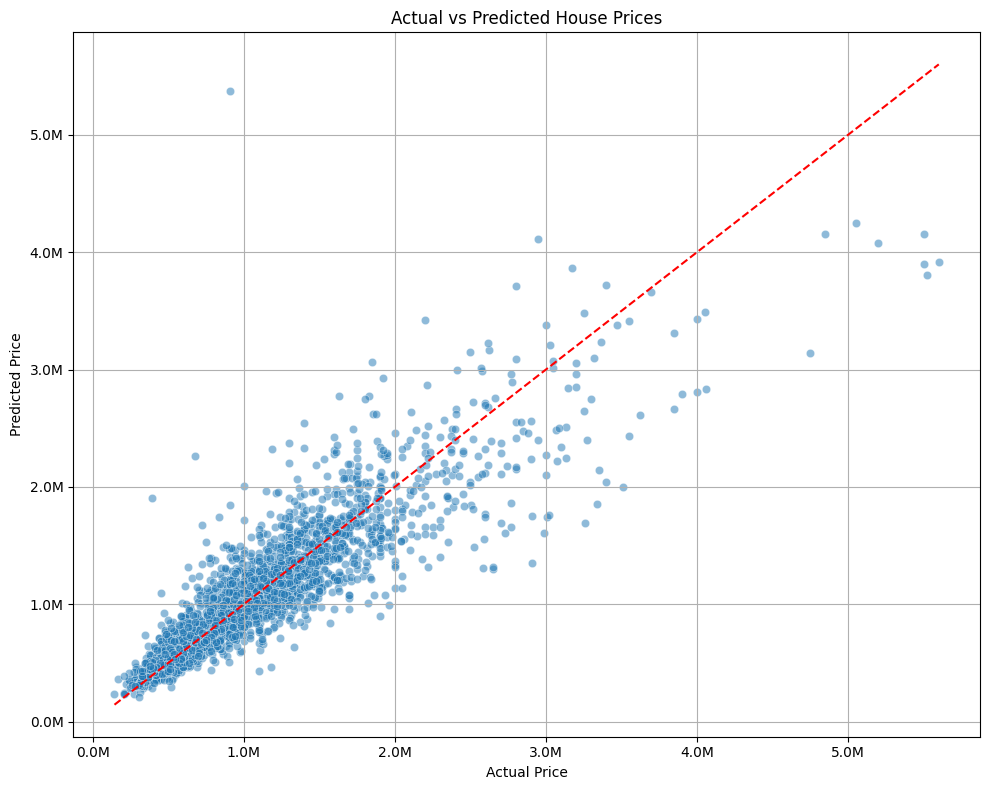

In [34]:
# Plot actual vs predicted

plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x=y_test, y=y_pred, alpha= 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle = '--')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x/1e6:.1f}M'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _ : f'{x/1e6:.1f}M'))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.tight_layout()
plt.savefig('../visuals/predicted_vs_actual.png')
plt.show()

In [35]:
joblib.dump(model, '../app/price_model.pkl')

['../app/price_model.pkl']